
# 📊 Credit Risk Prediction





This notebook presents a complete pipeline for predicting borrower credit risk using machine learning techniques. It includes:

📥 Data loading and inspection

📊 Exploratory data analysis (EDA)

🔠 Categorical encoding and alignment

⚖️ Class imbalance handling using SMOTE

📏 Feature scaling with StandardScaler

🧠 Model training using Decision Tree, Random Forest, and Gradient Boosting

📈 Evaluation with classification reports and confusion matrix visualizations

🏆 Model comparison for performance selection

💾 Saving the best model, scaler, and feature columns for deployment

🔮 Deployment-ready predict_credit_risk() function with user input integration

The goal is to build a robust and interpretable model that can accurately predict whether a borrower is high or low credit risk, enabling better lending decisions.

#📦 Importing Required Libraries

In [1]:
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#📥 Loading the Datasets

In [2]:
# Load the training and testing datasets from CSV files
train_df = pd.read_csv('/content/Training Data.csv')  # Contains features + risk_flag (target)
test_df = pd.read_csv('/content/Test Data.csv')       # Contains features only (for prediction)

# Display the first few rows of each dataset for verification
print("Training Dataset:\n", train_df.head())
print("Testing Dataset:\n", test_df.head())



Training Dataset:
    Id   income  age  experience  married house_ownership car_ownership  \
0   1  1303835   23           3   single          rented            no   
1   2  7574516   40          10   single          rented            no   
2   3  3991815   66           4  married          rented            no   
3   4  6256451   41           2   single          rented           yes   
4   5  5768871   47          11   single          rented            no   

            profession                 city           state  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh   
1   Software_Developer             Parbhani     Maharashtra   
2     Technical_writer            Alappuzha          Kerala   
3   Software_Developer          Bhubaneswar          Odisha   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   

   current_job_years  current_house_years  risk_flag  
0                  3                   13          0  
1                  9                   13      

## 🔎 Data Checks

In [3]:
# Display the full training dataset
train_df

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
# Display the full test dataset
test_df

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


## 🧹 Checking for Missing Values

In [5]:
# Check for missing values in the training and testing datasets
print("Missing values in training set:\n", train_df.isnull().sum())
print("Missing values in testing set:\n", test_df.isnull().sum())

Missing values in training set:
 Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64
Missing values in testing set:
 id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
dtype: int64


##🔍 Checking for Duplicates and Feature Count

In [6]:
# 🔁 Check for duplicate rows in the training dataset
duplicate_count = train_df.duplicated().sum()
print(f"Number of duplicated rows in the dataset: {duplicate_count}")

# 📊 Count the number of features (excluding the target column)
num_features = train_df.shape[1] - 1  # Assuming 'risk_flag' is the target column
print(f"Number of features in the dataset: {num_features}")

Number of duplicated rows in the dataset: 0
Number of features in the dataset: 12


# 📊 Exploratory Data Analysis (EDA)

## 🔹 1. Visualizing Class Distribution (Imbalanced Dataset)

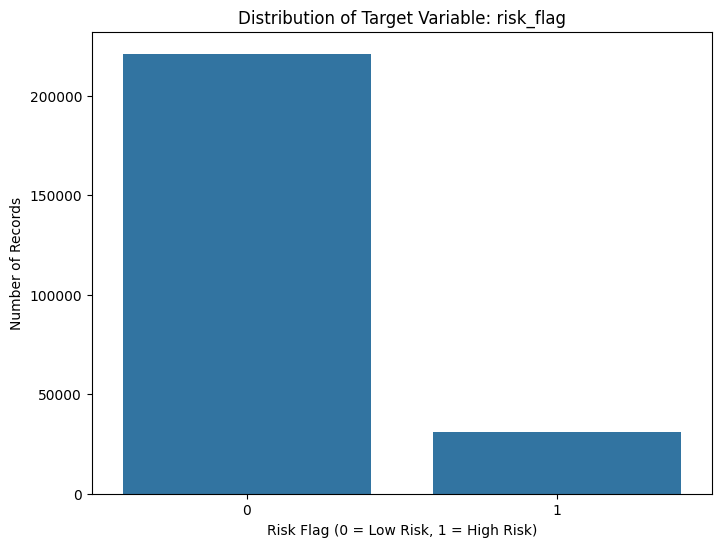

In [7]:
# Separating features and target
X = train_df.drop('risk_flag', axis=1)
y = train_df['risk_flag']

# Visualize the distribution of the target variable 'risk_flag'
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Distribution of Target Variable: risk_flag")
plt.xlabel("Risk Flag (0 = Low Risk, 1 = High Risk)")
plt.ylabel("Number of Records")
plt.show()

- The initial class distribution plot revealed a significant imbalance between the two classes, with the majority of borrowers labeled as low risk (risk_flag = 0). This highlights the need for balancing techniques like SMOTE, as models trained on imbalanced data tend to favor the majority class and perform poorly on the minority (high-risk) group.

##🔹 2. Visualizing Numerical Feature Distributions (e.g., income)

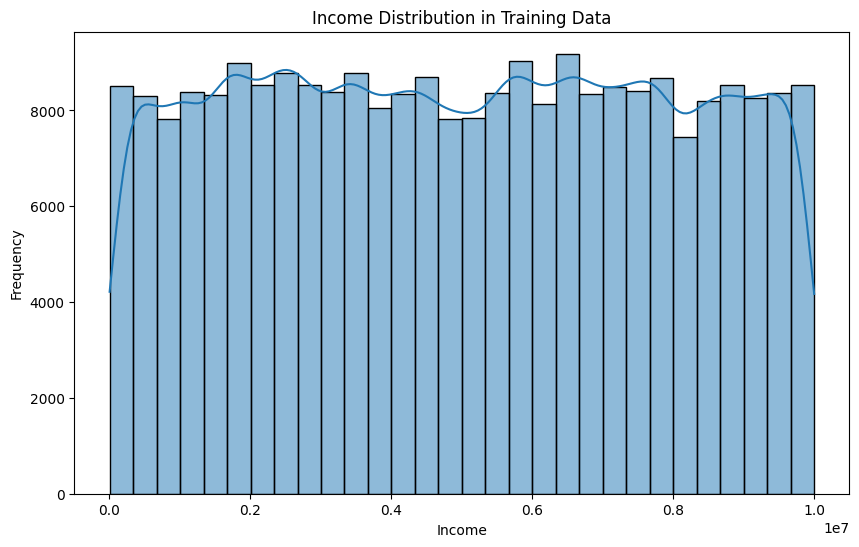

In [9]:
# Visualize the distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(train_df['income'], kde=True, bins=30)
plt.title('Income Distribution in Training Data')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

- The income distribution appears uniformly spread across the dataset, with no extreme peaks or dips. This indicates that the dataset includes a wide range of income levels and avoids heavy skewness.

##🔹 3. Age Distribution by Risk Flag

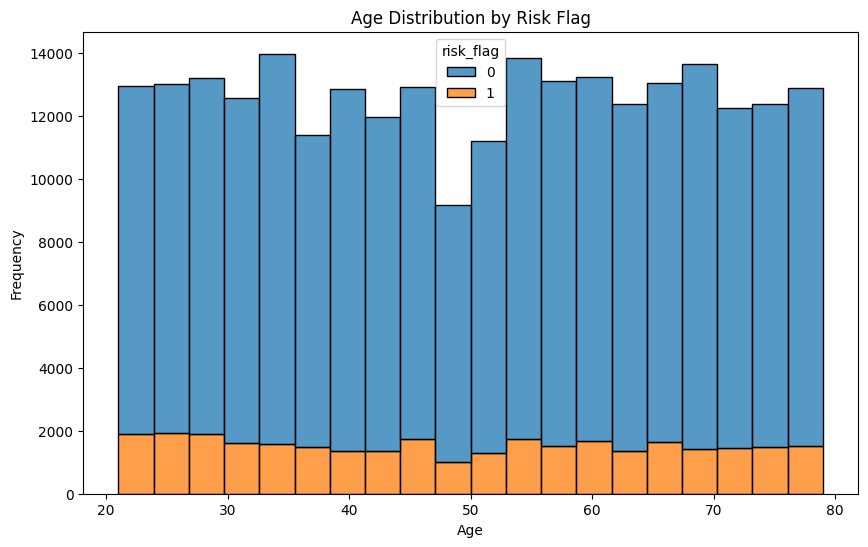

In [10]:
# Age distribution by risk flag
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='age', hue='risk_flag', multiple='stack', bins=20)
plt.title('Age Distribution by Risk Flag')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The stacked histogram shows that low-risk borrowers (risk_flag = 0) are distributed fairly evenly across all age groups, while high-risk borrowers (risk_flag = 1) are slightly more concentrated in the younger age brackets (20–40 years old). This may reflect that younger individuals have less financial stability or shorter credit histories, increasing their likelihood of default.

## 🔹 4. House Ownership vs Risk Flag

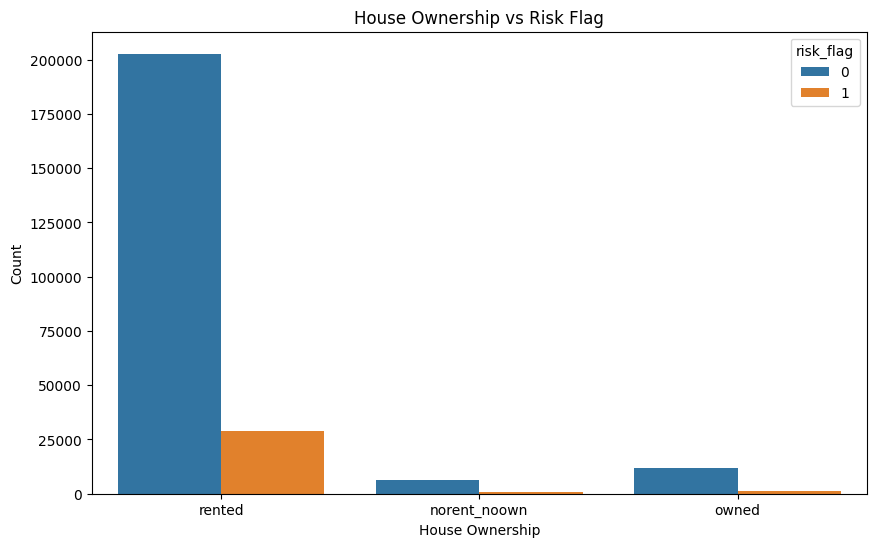

In [11]:
# 🏠 Relationship between house ownership and risk flag
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='house_ownership', hue='risk_flag')
plt.title('House Ownership vs Risk Flag')
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.show()

- The chart shows a clear dominance of the "rented" category, with the majority of both low-risk (risk_flag = 0) and high-risk (risk_flag = 1) individuals living in rented accommodations.

- However, the proportion of high-risk individuals is noticeably higher among those who rent compared to those who own homes or have no formal housing arrangement (norent_noown).

🔍 Key Observations:
1. Rented: This is the most common housing status. It contains the largest number of high-risk individuals, indicating a potential link between lack of home ownership and financial instability.

2. Owned: Borrowers who own homes have a very low proportion of high-risk cases, suggesting that home ownership might be associated with financial reliability and stability.

3. Norent_noown: This category also shows a small number of high-risk cases, but the group size is relatively small compared to others.

## 🔹 5. Correlation Heatmap (Numerical Features Only)

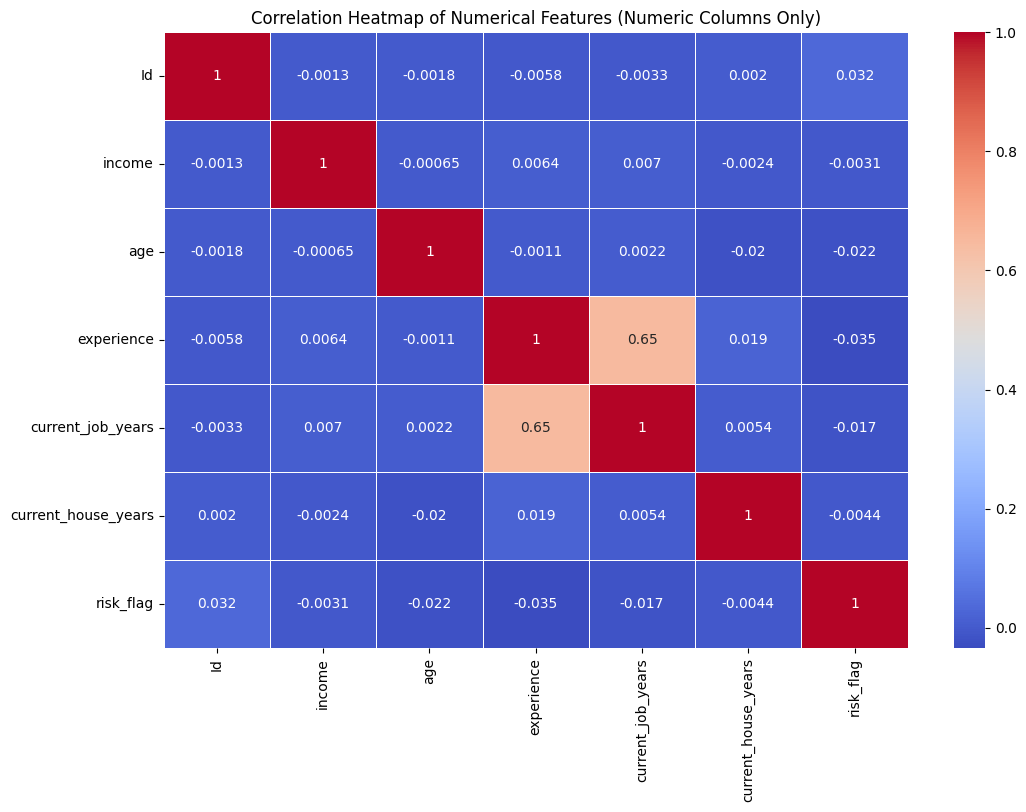

In [13]:
# Select only numerical columns for the correlation heatmap
numeric_columns = train_df.select_dtypes(include=['int64', 'float64'])

# 📊 Correlation heatmap to explore linear relationships
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Numeric Columns Only)')
plt.show()

# 🔠 Exploring Categorical Features

In [14]:
# 🔍 Identify all categorical columns in the dataset
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"🧠 Categorical Columns Found ({len(categorical_columns)}): {categorical_columns}\n")

🧠 Categorical Columns Found (6): ['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']



In [15]:
# 📊 Explore unique values and their counts in each categorical column
for col in categorical_columns:
    print(f"\n🔸 Column: '{col}'")
    print(f"Unique values ({train_df[col].nunique()}): {train_df[col].unique()}")
    print("\nValue Counts:")
    print(train_df[col].value_counts())
    print("-" * 40)


🔸 Column: 'married'
Unique values (2): ['single' 'married']

Value Counts:
married
single     226272
married     25728
Name: count, dtype: int64
----------------------------------------

🔸 Column: 'house_ownership'
Unique values (3): ['rented' 'norent_noown' 'owned']

Value Counts:
house_ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64
----------------------------------------

🔸 Column: 'car_ownership'
Unique values (2): ['no' 'yes']

Value Counts:
car_ownership
no     176000
yes     76000
Name: count, dtype: int64
----------------------------------------

🔸 Column: 'profession'
Unique values (51): ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biom

## 📈 Categorical Feature Distributions

<ipython-input-16-d8f2e23949b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='count', data=value_counts, ax=axes[i], palette="pastel")
<ipython-input-16-d8f2e23949b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='count', data=value_counts, ax=axes[i], palette="pastel")
<ipython-input-16-d8f2e23949b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='count', data=value_counts, ax=axes[i], palette="pastel")


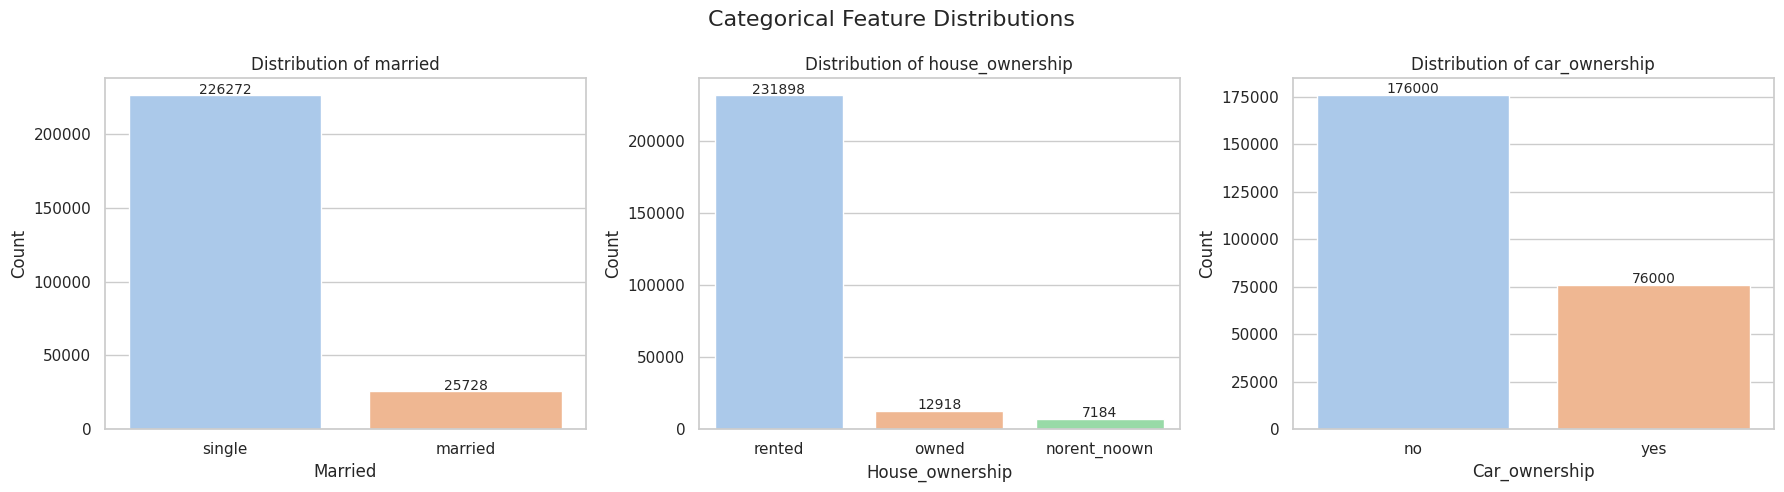

In [16]:
# 🎨 Set Seaborn plot style for clean visuals
sns.set(style="whitegrid")

# 👀 Categorical features to visualize
categorical_cols = ['married', 'house_ownership', 'car_ownership']

# 📊 Create side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 🔁 Loop through and plot each feature
for i, col in enumerate(categorical_cols):
    value_counts = train_df[col].value_counts().reset_index()
    value_counts.columns = [col, 'count']

    sns.barplot(x=col, y='count', data=value_counts, ax=axes[i], palette="pastel")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col.capitalize())

    # 🏷️ Add count labels on top of bars
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 1000, int(height), ha="center", fontsize=10)

# 🧩 Overall layout
plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


# 🔠 Encoding Categorical Features + Test Set Alignment

- One-hot encoding converts categorical features into numerical form suitable for ML models.

- reindex(columns=model_columns, fill_value=0) ensures the test set has the same features, even if it’s missing some categories from training (e.g. a rare profession or city).

In [18]:
# 🛡️ Make a copy of the raw test set for future use (e.g., prediction output)
X_test_raw = test_df.copy()

# 🎯 Separate features from target in training data
X = train_df.drop('risk_flag', axis=1)
y = train_df['risk_flag']

# 🔠 Apply one-hot encoding to both train and test sets
X_encoded = pd.get_dummies(X)
X_test_encoded = pd.get_dummies(test_df)

# 🔧 Align test columns with training columns
# This ensures the model sees the same feature structure
model_columns = X_encoded.columns  # Save column structure for later use (e.g., deployment)
X_test_encoded = X_test_encoded.reindex(columns=model_columns, fill_value=0)


# 🧪 Train-Test Split (Before SMOTE)

- Stratification ensures both training and test sets maintain the same class balance.

- SMOTE should only be applied on the training set after this step — not on the full dataset — to avoid artificially boosting model performance

In [19]:
# 🧪 Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,        # Features
    y,                # Target variable
    test_size=0.2,    # 20% for testing
    random_state=42,  # Ensures reproducibility
    stratify=y        # Preserve class distribution
)

# ⚖️ Handling Class Imbalance with SMOTE (Training Set Only)

- SMOTE synthesizes new samples for the minority class (high-risk borrowers in your case).

- This avoids biasing the model toward the majority class and improves fairness and generalization.

- Applied only on training data to prevent data leakage and inflated evaluation metrics

In [20]:
# ⚖️ Apply SMOTE only on training set
# 🔍 Check target distribution before SMOTE
print("📊 Target distribution BEFORE SMOTE:")
print(Counter(y_train))

# ⚖️ Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# ✅ Check target distribution after SMOTE
print("\n📊 Target distribution AFTER SMOTE:")
print(Counter(y_train_bal))


📊 Target distribution BEFORE SMOTE:
Counter({0: 176803, 1: 24797})

📊 Target distribution AFTER SMOTE:
Counter({0: 176803, 1: 176803})


## 📊 Visualizing Class Distribution Before and After SMOTE

- Helps demonstrate that class imbalance has been resolved visually.

<ipython-input-21-587b4986162c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-21-587b4986162c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


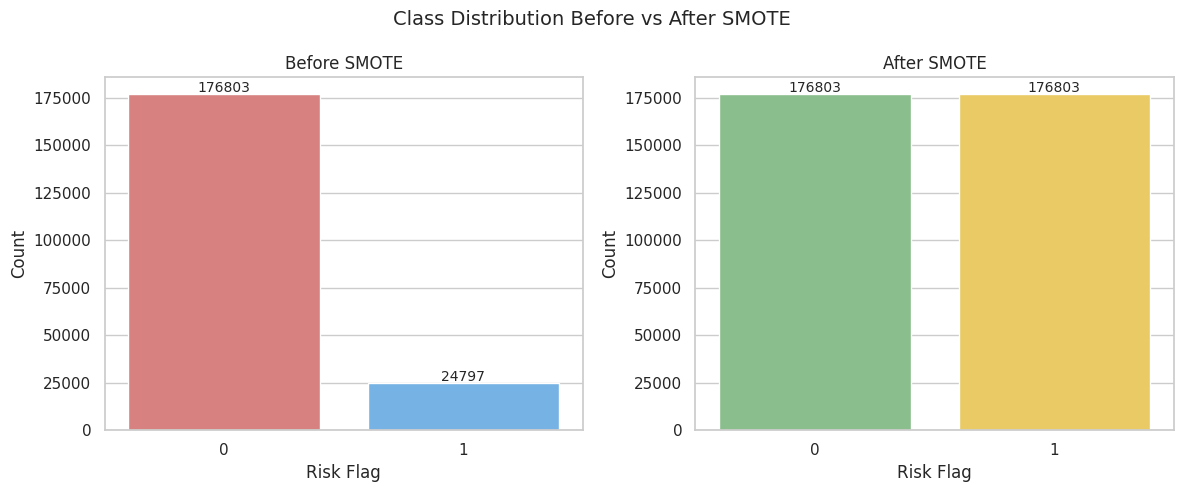

In [21]:
# 🎨 Count values before and after SMOTE
before_counts = Counter(y_train)
after_counts = Counter(y_train_bal)
classes = sorted(before_counts.keys())

# 📊 Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 🚫 Before SMOTE
sns.barplot(
    x=list(before_counts.keys()),
    y=list(before_counts.values()),
    ax=axes[0],
    palette=["#E57373", "#64B5F6"]
)
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Risk Flag")
axes[0].set_ylabel("Count")
for idx, val in enumerate(before_counts.values()):
    axes[0].text(idx, val + 1000, str(val), ha='center', fontsize=10)

# ✅ After SMOTE
sns.barplot(
    x=list(after_counts.keys()),
    y=list(after_counts.values()),
    ax=axes[1],
    palette=["#81C784", "#FFD54F"]
)
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Risk Flag")
axes[1].set_ylabel("Count")
for idx, val in enumerate(after_counts.values()):
    axes[1].text(idx, val + 1000, str(val), ha='center', fontsize=10)

# 🧩 Overall layout
plt.suptitle("Class Distribution Before vs After SMOTE", fontsize=14)
plt.tight_layout()
plt.show()


The visual comparison highlights the impact of applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the training dataset.

📊 Before SMOTE:
- Class 0 (low risk): 176,803 samples

- Class 1 (high risk): 24,797 samples

This shows a significant imbalance, with high-risk borrowers making up only a small fraction of the training data. Without correction, models would likely bias toward predicting the majority class, reducing the model’s ability to correctly detect high-risk cases — which are the most critical in credit risk prediction.

# 📏 Feature Scaling

- Standardize the feature values to ensure that all numerical features contribute equally to model training.

In [25]:
# 📏 Initialize the standard scaler
scaler = StandardScaler()

# ✅ Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_bal)

# 📊 Transform the internal test set (from train_test_split)
X_test_scaled = scaler.transform(X_test)

# 🧪 Transform the final external test set (from 'Test Data.csv')
X_final_test_scaled = scaler.transform(X_test_encoded)

In [24]:
print("✅ Preprocessing complete. Ready for model training!")

✅ Preprocessing complete. Ready for model training!


# 🧠 Modeling

## 🌳 Decision Tree Classifier – Training & Evaluation

- We train a DecisionTreeClassifier using the balanced and scaled training set, and evaluate its performance on the unseen test set.
- The classification_report provides precision, recall, F1-score, and accuracy for both classes (0 = low risk, 1 = high risk).

- The ConfusionMatrixDisplay visually shows how many high-risk and low-risk individuals were correctly/incorrectly predicted.

In [31]:
# 🌳 Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_bal)

# 🎯 Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# 📊 Evaluate the model
print("📊 Decision Tree Results")
print(classification_report(y_test, y_pred_dt))

📊 Decision Tree Results
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     44201
           1       0.54      0.58      0.56      6199

    accuracy                           0.89     50400
   macro avg       0.74      0.76      0.75     50400
weighted avg       0.89      0.89      0.89     50400



### **Analysis**

🌳 Decision Tree Model – Performance Analysis
📈 Classification Report Highlights:
- Precision for class 0 (low risk): 0.94
- Precision for class 1 (high risk): 0.54
- Recall for class 0: 0.93
- Recall for class 1: 0.58
- Overall accuracy: 0.89

The model performs very well in identifying low-risk borrowers (class 0), with high precision and recall. However, its performance on high-risk borrowers (class 1) is moderate, with a lower recall of 0.58 — meaning it still misses a fair number of high-risk individuals.

### Visualize the confusion matrix of Decision Tree Model

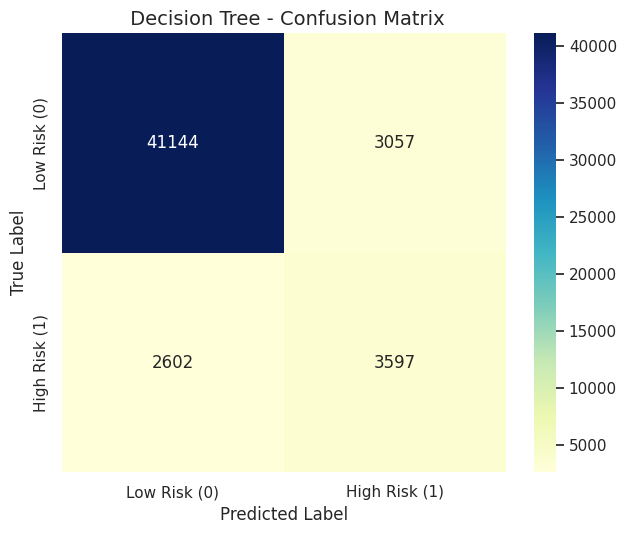

In [34]:
# 📋 Label names
labels = ['Low Risk (0)', 'High Risk (1)']

# 🔁 Function to plot confusion matrix
def plot_confusion_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6.5, 5.5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
    plt.title(f' {title} - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


# 🌳 Decision Tree
plot_confusion_heatmap(y_test, y_pred_dt, "Decision Tree")

#### **Analysis**

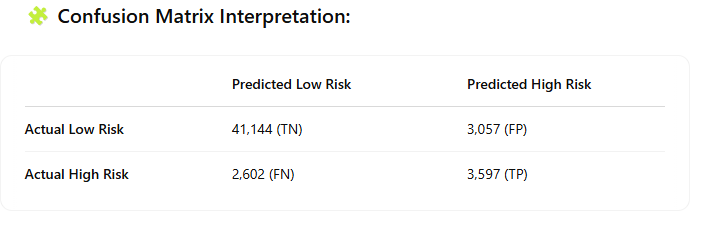

1. **True Negatives (TN)**: 41144 low-risk cases were correctly classified.
2.**True Positives (TP)**: 3,597 high-risk cases correctly identified.
3.**False Negatives (FN)**: 2,602 high-risk cases incorrectly classified as low-risk
4. **False Positives (FP)**: 3,057 low-risk individuals wrongly predicted as high-risk


- The Decision Tree model achieves strong overall accuracy, especially in detecting low-risk individuals.

- It still struggles to detect some high-risk cases, which is expected in imbalanced classification problems.

- While SMOTE helps improve the balance, more advanced models (e.g., Random Forest or Gradient Boosting) may further improve high-risk prediction.

## 🌲 Random Forest Classifier – Training & Evaluation

- Train a robust ensemble model using RandomForestClassifier and evaluate its performance on the test set.

- ✅ Why Random Forest?
1. Handles high-dimensional data well
2. Resistant to overfitting
3. Can rank feature importance

In [35]:
# 🌲 Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_bal)

# 🎯 Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# 📊 Evaluate the model
print("📊 Random Forest Results")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Results
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     44201
           1       0.61      0.47      0.53      6199

    accuracy                           0.90     50400
   macro avg       0.77      0.72      0.74     50400
weighted avg       0.89      0.90      0.89     50400



### **Analysis**

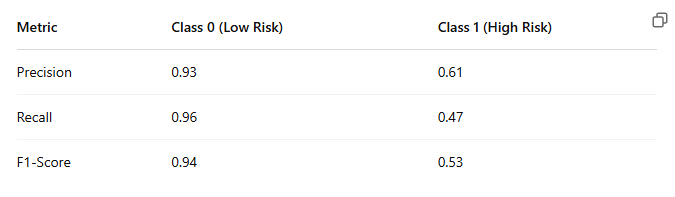

- The model performs very well on low-risk borrowers with high precision and recall.

- It shows moderate performance on high-risk cases — better precision than the Decision Tree (0.61 vs. 0.54), but slightly lower recall (0.47 vs. 0.58).

- The overall accuracy is 0.90, which is strong, but as with any imbalanced dataset, accuracy alone can be misleading.

### Visualize the confusion matrix of Random Forest Model

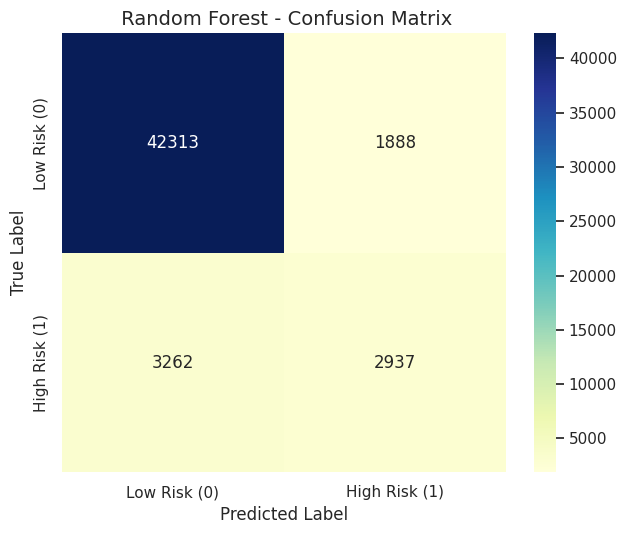

In [36]:
# 🌲 Random Forest
plot_confusion_heatmap(y_test, y_pred_rf, "Random Forest")

#### **Analysis**

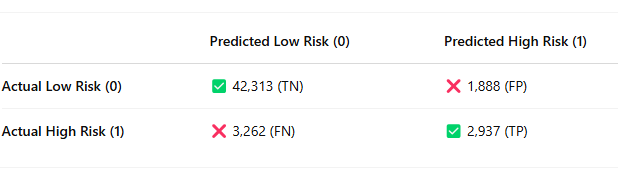bold text

✅ True Negatives (TN): 42,313 — low-risk borrowers correctly identified.

❌ False Positives (FP): 1,888 — low-risk borrowers wrongly flagged as high risk.

❌ False Negatives (FN): 3,262 — high-risk borrowers missed by the model.

✅ True Positives (TP): 2,937 — high-risk borrowers correctly flagged.


- The Random Forest model is very strong at recognizing low-risk borrowers, making it reliable for approving safe applicants.

- While its recall for high-risk borrowers is moderate (0.47), it’s slightly lower than the Decision Tree (0.58), but it compensates with better precision and overall balanced performance.

- It maintains better generalization and is a good candidate for deployment when the cost of false negatives is moderately tolerable.

## 🚀 Gradient Boosting Classifier – Training & Evaluation

📝 Why Gradient Boosting?
- It’s often more accurate than other models on tabular data

- Can capture complex relationships through additive trees

- Tends to work well on imbalanced datasets after SMOTE

In [37]:
# 🚀 Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train_bal)

# 🎯 Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test_scaled)  # ✅ fixed parenthesis

# 📊 Evaluate the model
print("📊 Gradient Boosting Results")
print(classification_report(y_test, y_pred_gbm))  # ✅ fixed classification report

📊 Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     44201
           1       0.23      0.17      0.19      6199

    accuracy                           0.83     50400
   macro avg       0.56      0.54      0.55     50400
weighted avg       0.81      0.83      0.82     50400



### **Analysis**

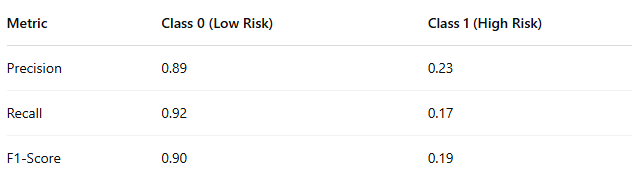

- The model is very accurate in identifying low-risk borrowers, with high precision and recall.

- Performance on high-risk borrowers is notably poor, with both precision (0.23) and recall (0.17) significantly lower than with Random Forest or Decision Tree.

- Overall accuracy is 0.83, which appears decent, but the model is strongly biased toward the majority class (low-risk).

### Visualize the confusion matrix of Gradient Boosting Model

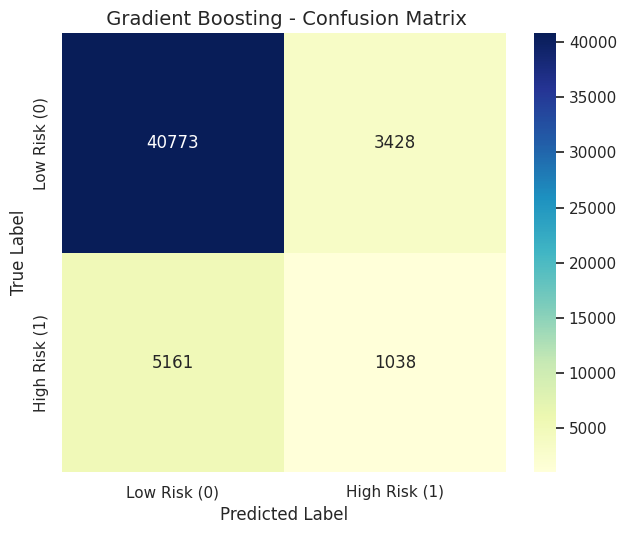

In [38]:
# 🚀 Gradient Boosting
plot_confusion_heatmap(y_test, y_pred_gbm, "Gradient Boosting")

#### **Analysis**

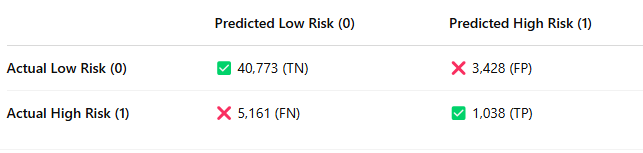

✅ True Negatives (TN): 40,773 — low-risk borrowers correctly predicted.

❌ False Negatives (FN): 5,161 — high-risk borrowers incorrectly classified as low risk.

❌ False Positives (FP): 3,428 — safe borrowers flagged as risky.

✅ True Positives (TP): 1,038 — high-risk borrowers correctly identified.

- The Gradient Boosting model, while strong at detecting safe borrowers, performs poorly at identifying high-risk borrowers, which is a critical aspect of credit risk modeling.

- The model’s low recall for class 1 suggests it misses most of the borrowers who are actually high risk — which may be unacceptable in real-world financial applications.

- While Gradient Boosting delivers a solid accuracy and F1-score for low-risk cases, it is not suitable in this case due to its high false-negative rate. Compared to the Decision Tree and Random Forest, it performs worst in identifying the minority class, which is the most important in this use case.

## 📊 Comparative Analysis of Models

- This chart compares the accuracy scores of the three trained models:

1. Random Forest
2. Decision Tree
3. Gradient Boosting

<ipython-input-39-69fb2a2dde12>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='magma')


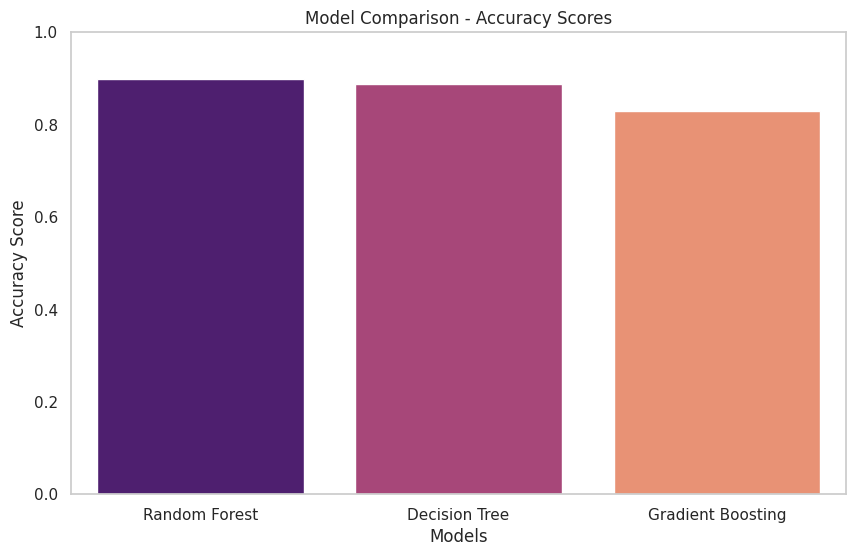

In [39]:
# 📋 Define model names and their accuracy scores
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting']
accuracy_scores = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_gbm)
]

# 📈 Bar plot to compare accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='magma')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

## 🧩 Confusion Matrices – All Models Side by Side

- This section visualizes the confusion matrices for all three models to better understand where each model succeeds or fails in predicting credit risk.

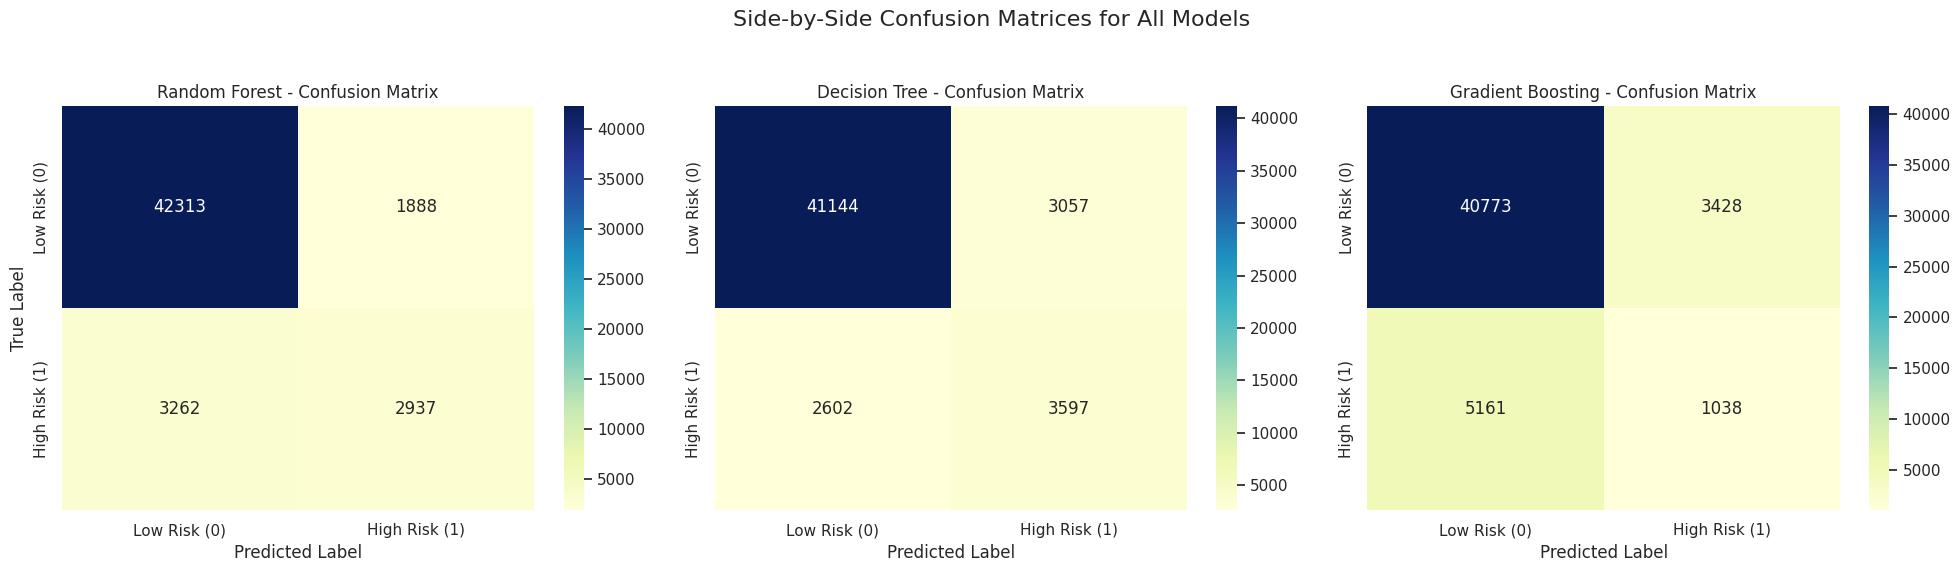

In [40]:
# 🔤 Labels
labels = ['Low Risk (0)', 'High Risk (1)']

# 🔁 Get confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

# 🎨 Plot side-by-side using heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Random Forest - Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Decision Tree - Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("")

# Gradient Boosting
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Gradient Boosting - Confusion Matrix")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("")

# 🧩 Layout
plt.suptitle("Side-by-Side Confusion Matrices for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Summary

✅ Random Forest has the highest overall accuracy and balanced performance across both classes.

🔄 Decision Tree performs slightly better on detecting high-risk borrowers, with the best recall and F1-score for class 1.

⚠️ Gradient Boosting struggles to correctly identify high-risk borrowers, making it less suitable for deployment in this case.

# Ready for Deployment

## 💾 Saving Trained Model & Preprocessing Artifacts for Deployment

- This step saves the model and preprocessing components to disk so they can be used later in a deployment environment (e.g., Streamlit, Flask API, or Jupyter inference).

In [41]:
import joblib

# 💾 Save the best-performing model (Random Forest)
joblib.dump(rf_model, "random_forest_model.pkl")

# 💾 Save the fitted StandardScaler for future input transformation
joblib.dump(scaler, "scaler.pkl")

# 💾 Save the encoded feature columns (used to align future inputs)
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']

## 🧠 predict_credit_risk() – Deployment-Ready Function

In [42]:
def predict_credit_risk(input_data: dict) -> int:
    """
    Predict credit risk using the saved Random Forest model.

    Args:
        input_data (dict): Example:
            {
                'income': 45000,
                'age': 30,
                'experience': 5,
                'married': 'yes',
                'house_ownership': 'rented',
                'car_ownership': 'no',
                'profession': 'engineer',
                'city': 'City_45',
                'state': 'State_3',
                'current_job_years': 2,
                'current_house_years': 4
            }

    Returns:
        int: 0 for low risk, 1 for high risk
    """

    # 🔁 Load saved model components
    model = joblib.load("random_forest_model.pkl")
    scaler = joblib.load("scaler.pkl")
    model_columns = joblib.load("model_columns.pkl")

    # 📦 Convert input dictionary to DataFrame
    df = pd.DataFrame([input_data])

    # 🔠 One-hot encode and align with training columns
    df_encoded = pd.get_dummies(df)
    df_encoded = df_encoded.reindex(columns=model_columns, fill_value=0)

    # 📏 Scale features
    df_scaled = scaler.transform(df_encoded)

    # 🔍 Make prediction
    prediction = model.predict(df_scaled)

    return int(prediction[0])


### 🧪 Example: Predict Credit Risk for a New Borrower

In [43]:
# 📋 Sample input: borrower's profile
user_input = {
    'income': 50000,
    'age': 28,
    'experience': 4,
    'married': 'yes',
    'house_ownership': 'rented',
    'car_ownership': 'yes',
    'profession': 'civil engineer',
    'city': 'City_10',
    'state': 'State_1',
    'current_job_years': 3,
    'current_house_years': 2
}

# 🔍 Get the prediction
result = predict_credit_risk(user_input)

# 🧾 Show result
print("🔍 Prediction:", "❌ High Risk" if result == 1 else "✅ Low Risk")


🔍 Prediction: ❌ High Risk


## 🧾 get_user_input() – Interactive CLI Input for Deployment Testing

In [44]:
def get_user_input():
    """
    Collects borrower information from the user via command-line input.

    Returns:
        dict: A dictionary with borrower features for risk prediction.
    """
    print("🔍 Please enter borrower information for credit risk prediction:\n")

    input_data = {
        'income': float(input("Income (e.g., 50000): ")),
        'age': int(input("Age (e.g., 30): ")),
        'experience': int(input("Years of Work Experience: ")),
        'married': input("Married (yes or no): ").strip().lower(),
        'house_ownership': input("House Ownership (owned, rented, norent_noown): ").strip().lower(),
        'car_ownership': input("Car Ownership (yes or no): ").strip().lower(),
        'profession': input("Profession (e.g., software engineer): ").strip().lower(),
        'city': input("City (e.g., City_45): ").strip(),
        'state': input("State (e.g., State_3): ").strip(),
        'current_job_years': int(input("Years at Current Job: ")),
        'current_house_years': int(input("Years in Current House: "))
    }

    return input_data


### 🧪 Run the Full Prediction Flow with Live User Input

In [ ]:
# 🔽 Get user input from the terminal
user_input = get_user_input()

# 🔮 Predict
result = predict_credit_risk(user_input)

# ✅ Display prediction
print("\n📊 Prediction:", "❌ High Risk" if result == 1 else "✅ Low Risk")


🔍 Please enter borrower information for credit risk prediction:

Income (e.g., 50000): 50000
Age (e.g., 30): 30
Years of Work Experience: 3
Married (yes or no): yes
House Ownership (owned, rented, norent_noown): rented
Car Ownership (yes or no): yes
Profession (e.g., software engineer): software engineer
City (e.g., City_45): City_45
State (e.g., State_3): State_3
Years at Current Job: 5
Years in Current House: 2

📊 Prediction: ❌ High Risk
